## Churn Problem

### Business Understanding

 Please check the report where you will find a detailed description of Business Understanding.

### Data Understanding

- loading useful modules

In [ ]:

#matplotlib inline    ///////
#matplotlib qt        //////
import numpy as np              #'Numpy' introduces an easier management of tables of numbers
import pandas as pd             #Load the 'Pandas' libraries with alias 'pd'
import matplotlib.pyplot as plt #'Pyplot' is intended for interactive plots and simple cases of programmatic plot generation
import seaborn as sns           #'Seaborn' is a library for making statistical graphics in Python. It builds on top of matplotlib
                                #and integrates closely with pandas data structures
from sklearn.metrics import plot_confusion_matrix ,confusion_matrix, accuracy_score, classification_report #import confusion_matrix, accuracy_score, classification_report from sklearn.metrics 
from sklearn.model_selection import GridSearchCV  #import of GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans     #Import the  KMeans model from sklearn
from sklearn.metrics import silhouette_samples, silhouette_score    #Import the  silhouette_samples and  silhouette_score model from sklearn
from sklearn import preprocessing  #Import the model preprocessing from sklearn

- Data loading

In [ ]:
data = pd.read_csv('BD.csv') # Read data from file 'BD.csv' 
                                                            

- Display the 5 first lines of our dataset

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Display the last 5 lines of our Dataset

In [ ]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


- Diplay the number of rows and columns

In [ ]:
data.shape

(7043, 21)

=>Our dataset containes 7043 rows and 21 columns.

- Visualize some information about the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


==> As we can see in the output, the summary includes list of all columns with their data types 
and  we can see that all of our features have no missing ("non-null") values in each column. we also have the value of rangeindex provided for the index axis.
* tenure , SeniorCitizen, MonthlyCharges : are numerical features 
* The rest of the features               : are categorical features


- Print the short summary of the dataframe by setting verbose = False 

In [ ]:
data.info(verbose = False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 21 entries, customerID to Churn
dtypes: float64(1), int64(2), object(18)
memory usage: 1.1+ MB


==> As, we can see in the output, the summary is very crisp and short.
   It is helpful when we have 1000s of attributes in dataframe.

- Print the full summary of the dataframe with null count excluded 

In [ ]:
data.info(verbose = True , null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   customerID        object 
 1   gender            object 
 2   SeniorCitizen     int64  
 3   Partner           object 
 4   Dependents        object 
 5   tenure            int64  
 6   PhoneService      object 
 7   MultipleLines     object 
 8   InternetService   object 
 9   OnlineSecurity    object 
 10  OnlineBackup      object 
 11  DeviceProtection  object 
 12  TechSupport       object 
 13  StreamingTV       object 
 14  StreamingMovies   object 
 15  Contract          object 
 16  PaperlessBilling  object 
 17  PaymentMethod     object 
 18  MonthlyCharges    float64
 19  TotalCharges      object 
 20  Churn             object 
dtypes: float64(1), int64(2), object(18)
memory usage: 1.1+ MB


- Displays the list of features(variables)

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- Index display

In [ ]:
data.index

RangeIndex(start=0, stop=7043, step=1)

=>the lines are indexed from 0 to 7043.

- Visualize the columns that contain missing values

In [ ]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- '0' =there are not missing values
- '1' =there are missing values 

=>As we can see there are no missing values in our dat

- Produce a summary of descriptive statistics :

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- Verify if our data is symmetrical or not:

In [ ]:
abs(((data.mean()-data.median())/data.mean())*100)

SeniorCitizen     100.000000
tenure             10.414053
MonthlyCharges      8.629033
dtype: float64

==> When the mean and the median are different then it is likely the data is not symmetrical 
but is either skewed to the left or the right.

- Visualize the number of churners and the number of the clients who didnt left the telecom operator:

In [ ]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

=>5174 of the cutomers remained as clients while 1869 of the customers left the telecom operator.

- Visualize the pourcentage of clients and the pourcentage of churners:

In [ ]:
(data["Churn"].value_counts()/7043)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Text(0.5, 1.0, '% of customers churn')

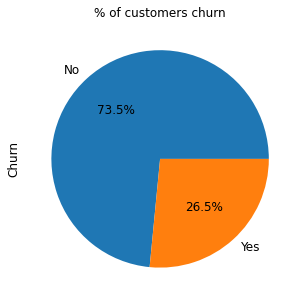

In [ ]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
ax = (data['Churn'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                     
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('% of customers churn', fontsize = 12)

73.46% of customers remained as clients while  26.53% of the customers became churners.
    

- data_cat contains the categorical features

In [ ]:
data_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']

- Draw the histograms:

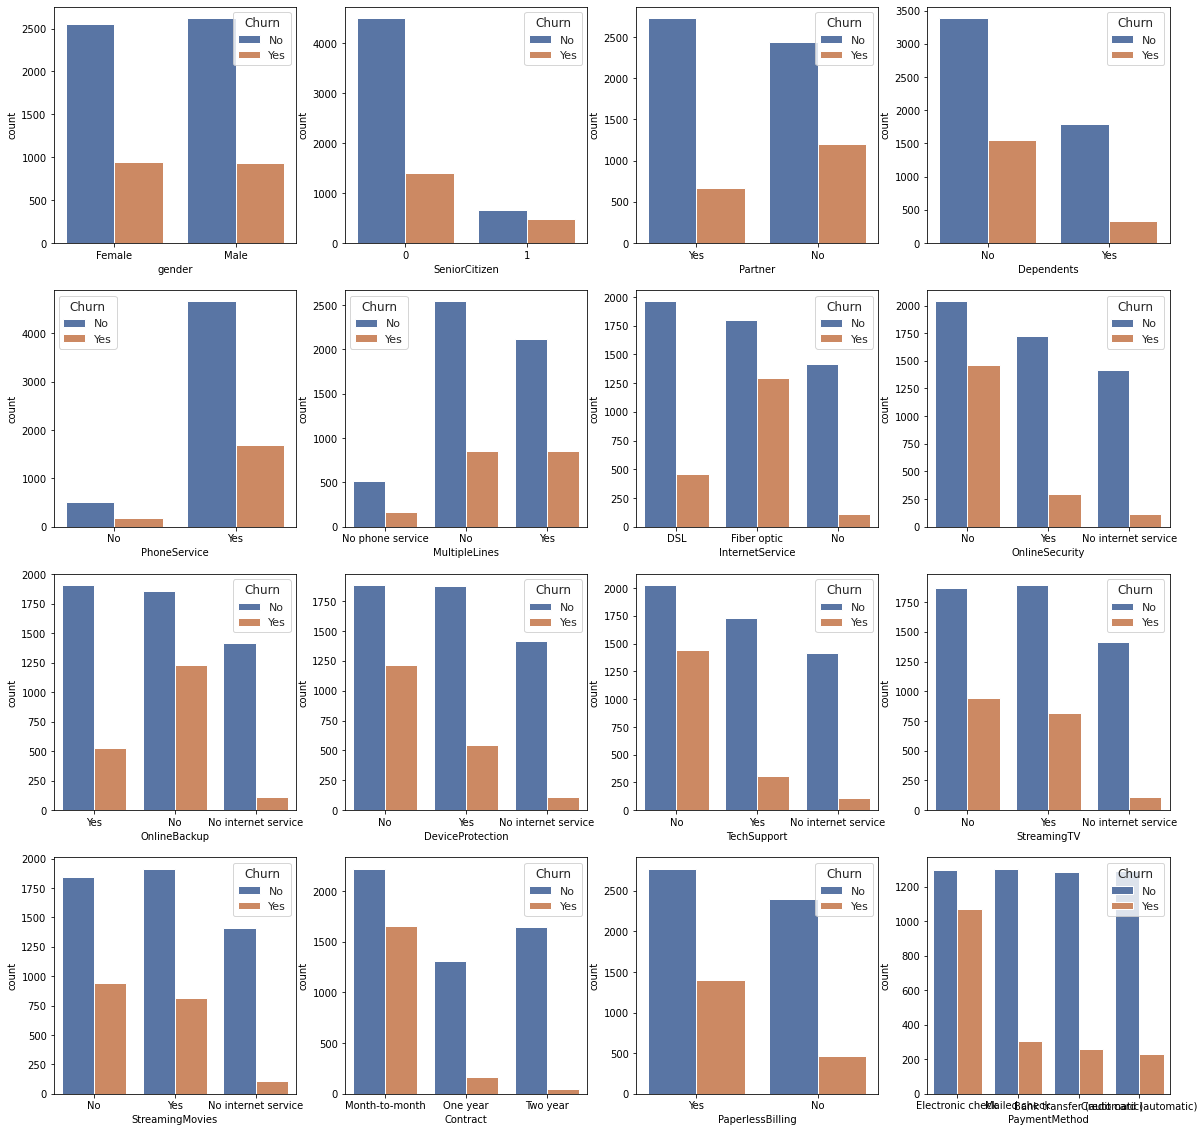

In [ ]:
fig , ax = plt.subplots(4,4,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data_cat):
    sns.countplot(x=data[col],hue=data["Churn"],ax=axis)

- Visualize the pourcentage of InternetService :

Text(0.5, 1.0, '  InternetService  %')

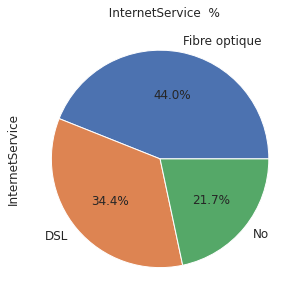

In [ ]:
import matplotlib.ticker as mtick # For specifying the axes tick format 
ax = (data['InternetService'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Fibre optique', 'DSL','No'],figsize =(5,5), fontsize = 12 )                                                     
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('InternetService',fontsize = 12)
ax.set_title('  InternetService  %', fontsize = 12)

##### - Describing the impact of each feature on the number of churn:

- feature Churn :the number of clients who stayed is three times  higher than those who left.

- feature gender: 
We notice that despite the fact that women are in the minority in the data set,the number of women who leave is higher than that of men.

- feature SeniorCitizen: we notice that the number of the least aged people who will leave is large compared to the number of the oldest people .

- feature Partner: Customer who don't have partners are more likely to leave than those who do.

- feature Dependent: We notice a big difference between non-dependent churns and dependent churns, the more dependents contains a very small number of churn that we can neglect in front of the number of dependents.

- feature PhoneService:We notice that the number of churns that have a phone service is very large by comparingit with the churns that do not have a phone service but after we have made a percentage calculation we notice that the percentage of churns that have a phone service is almost equal (26%) to churn who do not have phone service so we can delete this column.

- feature MultipleLines: we will delete this column since the percentage of the different categories of churn are almost equal (25%) so this column has no impact on the churn status. 

- feature InternetService: we notice a big difference in terms of percentage especially between the churns who use dsl (19%)and the churns which use the optical fiber (42%) more we have a low percentage of the churns which do not have internet ( 7.5%) so we can conclude that this column gives a lot of information about the churn status.

- feature OnlineSecurity: churns who do not have online security are the largest in terms of percentage.

- feature OnlineBackup: Churns who do not have an online backup are the largest in terms of percentage.

- feature DeviceProtection:most of the people who leave are the ones who do not have a protection device.

- feature TechSupport: most of the people who leave are the ones who do not have tech support.

 - feature StreamingTV: We notice that most of the people who leave are the ones who have internet service.Moreover the percentage of churns that have TV streaming is almost equal to the pourcentafe of churns who do not have TV streaming.

- feature StreamingMovies: We notice that most of the people who leave are the ones who have internet service.
Moreover the percentage of churns who have streaming Movies is almost equal to churns who do not have stream Movies.

- feature Contract: we notice that most of the churns are those who have the month to month contract after 
that we find the annual contract and the smallest percentage is that of two year contract.//

-  feature PaperlessBilling:  most of the people who leave are the ones who have a paperless billing.

- feature PaymentMethod: most of the churns are the people who pay with the electronic bank after  that we find the method mailed check and the smallest percentage is that of bank transfer and credit card.///

##### =>conclusion: the features 'customerID','gender'and 'PhoneService' dont contain any useful information that can determine whether the client is a churn or no.We decide to remove them from the dataset.

## Data Preparation

#### 1) Removing uncessary columns :

In [ ]:
data.drop(columns=['customerID','gender', 'PhoneService',],axis=1,inplace=True)

In [ ]:
data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

#### 2) Converting the feature "Totalcharges " to float value:

In [ ]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7032 non-null   float64


=> the feature "TotalCharges " is successfully converted.

#### 3)Visualizing the columns that contain missing values and removing null values.

In [ ]:
data.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

=>As we can see,the column "TotalCharges" contains 11 missing values.

- Removing the missing values from the dataset:

In [ ]:
data.dropna(how='any',inplace=True)

In [ ]:
data.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

=>Our dataset dont contain any missing values.

#### 4) Encoding

In [ ]:
data.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- our dataset contains 4 numerical variables and the rest are categorical variables. 
- The categorical variables should be converted to numerical variables so that we can be able to treat them.

In [ ]:
data_dummies = pd.get_dummies(data, columns=['Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'], drop_first=True)
data_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


By default, the get_dummies() does not do dummy encoding, but One-Hot encoding. To produce an actual dummy encoding from a 
DataFrame, we need to pass drop_first=True.

- Visualizing the columns generated by the dummy encoding:

In [ ]:
data_dummies.columns 

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Partner_Yes', 'Dependents_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

- Visualizing the target variable "Churn":

#### - Correlation Matrix

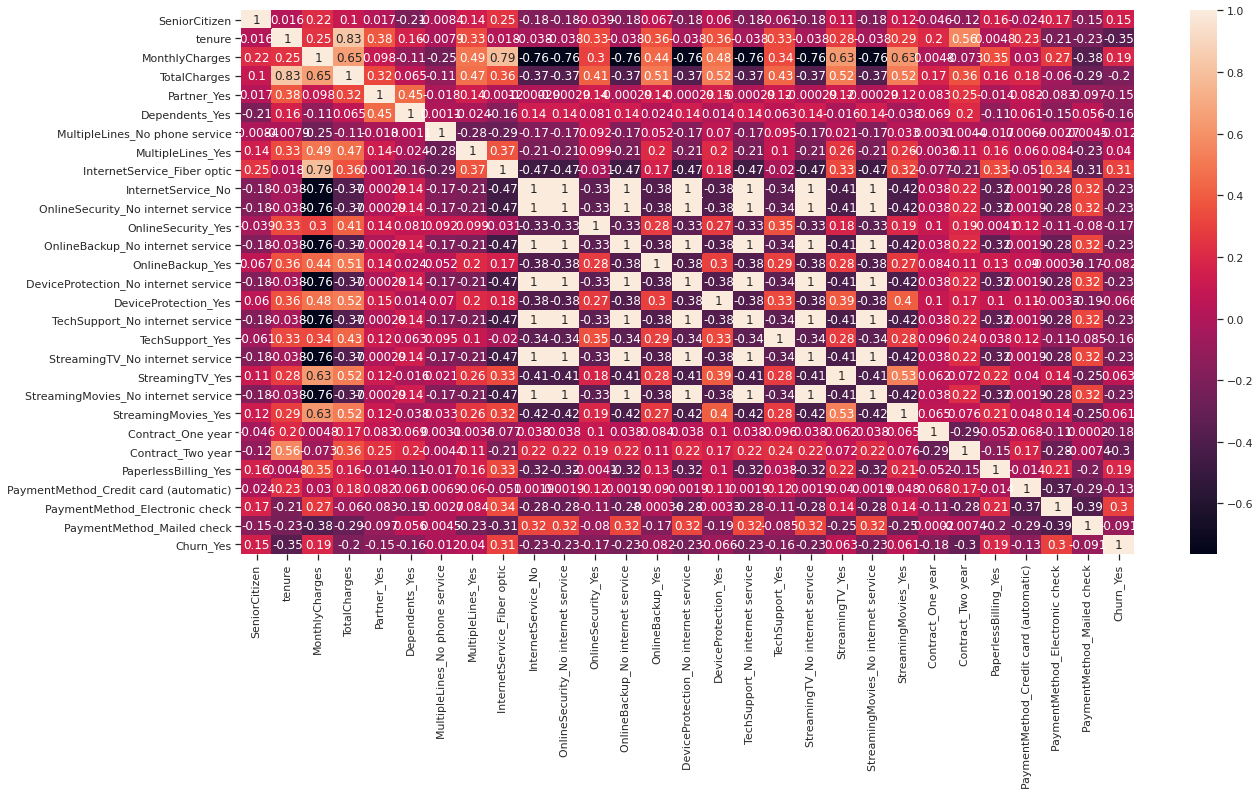

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data_dummies.corr(),annot = True)

=> We got high  correlation (1) between 'InternetService_No' feature  and the features :
'OnlineSecurity_No internet service','OnlineBackup_No internet service', 'DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service' .

### Dropping highly correlated variables.

In [ ]:
data_dummies.drop(columns=['OnlineSecurity_No internet service','OnlineBackup_No internet service', 'DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1,inplace=True)

In [ ]:
data_dummies.columns 

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Partner_Yes', 'Dependents_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [ ]:
data_dummies.shape

(7032, 23)

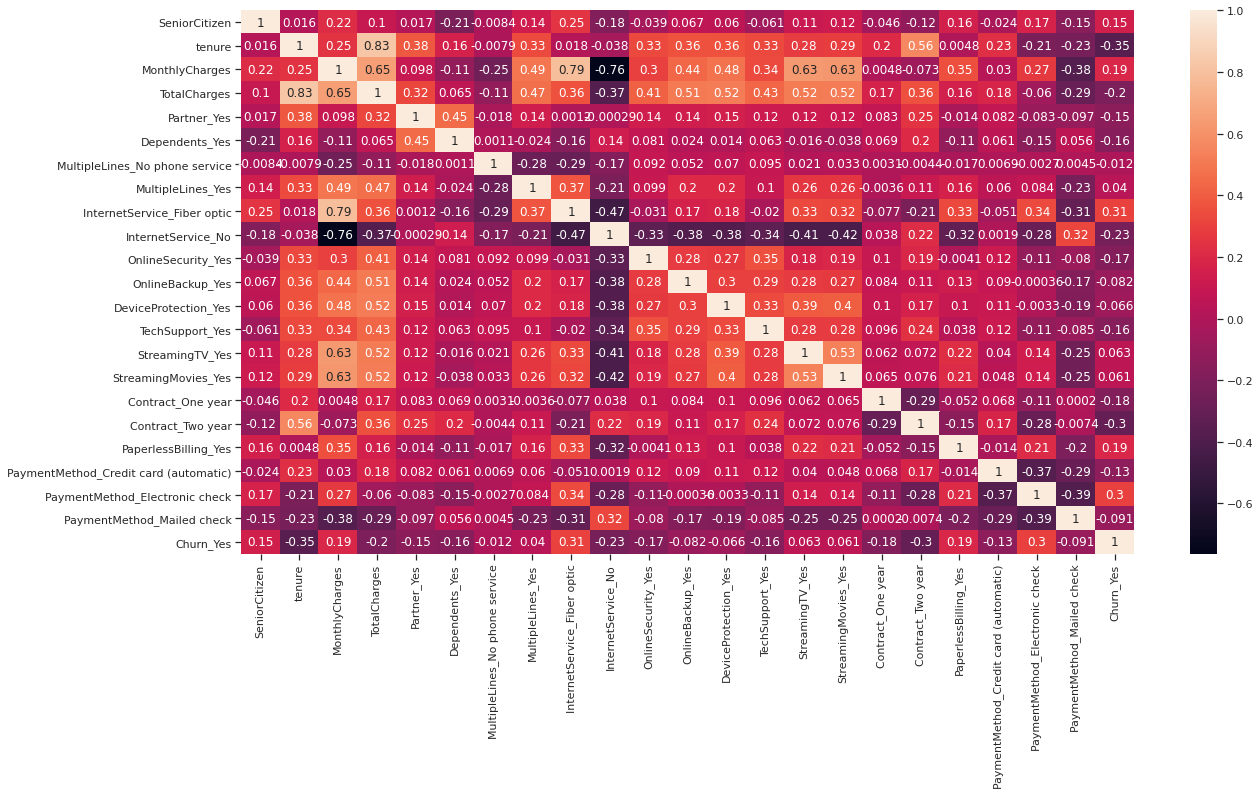

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data_dummies.corr(),annot = True)

 =>  We have no more high correlated columns 

In [ ]:
target_dummies = data_dummies['Churn_Yes']
target_dummies

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7032, dtype: uint8

#### 5) Normalization 

In [ ]:
X=data_dummies.iloc[:,0:-1] #X contains all the features of our dataset except "Churn" feature

In [ ]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,0,1,0,0,1,0,1,1,1,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
Y=data.iloc[:,-1]  #Y contains our target feature "Churn"

In [ ]:
Y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [ ]:
X.shape

(7032, 22)

In [ ]:
Y.shape

(7032,)

In [ ]:
X.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.482509,0.298493,0.096701,0.421928,0.440273,0.216155,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.209329,0.239619,0.592719,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.085974,2266.771362,0.499729,0.457629,0.295571,0.493902,0.496455,0.411650,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.406858,0.426881,0.491363,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- The variable "SeniorCitizen" has values between the min:0.00 and the max: 1.00 while the variable "MonthlyCharges" has values between the min:18.25 and the max:118.750 =>
- We notice a huge difference between the values of our variables that's why we should normalize our data.

- Division of X and Y to X_train,X_test,Y_train,Y_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2964,0,24,58.35,1346.90,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
5113,0,71,113.65,8166.80,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0,1,0,0
5363,0,70,25.35,1715.15,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
5074,0,49,19.45,921.30,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
156,0,22,84.15,1821.95,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,0,1,18.90,18.90,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3269,0,65,24.80,1600.95,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1658,0,50,105.95,5341.80,1,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,0,0
2612,0,14,80.45,1137.05,1,1,0,1,0,0,0,1,0,1,1,1,0,0,0,1,0,0


In [ ]:
X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,0,1,20.65,20.65,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5814,0,16,20.60,330.25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
2645,0,1,19.80,19.80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3983,0,1,24.25,24.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
6438,1,1,74.40,74.40,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,0,69,84.45,5848.60,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0
5702,1,71,105.10,7548.10,1,1,0,1,1,0,1,1,0,0,1,1,0,0,1,1,0,0
1662,0,5,69.75,324.60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2766,0,64,115.00,7396.15,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0


In [ ]:
Y_train

2964     No
5113     No
5363     No
5074     No
156      No
       ... 
4939     No
3269     No
1658    Yes
2612     No
2737     No
Name: Churn, Length: 5625, dtype: object

In [ ]:
Y_test

5561     No
5814     No
2645     No
3983    Yes
6438    Yes
       ... 
2757     No
5702    Yes
1662    Yes
2766     No
2918     No
Name: Churn, Length: 1407, dtype: object

In [ ]:
X_train.shape

(5625, 22)

In [ ]:
Y_train.shape

(5625,)

In [ ]:
X_test.shape

(1407, 22)

In [ ]:
Y_test.shape

(1407,)

In [ ]:
#feature scaling 
from sklearn.preprocessing import RobustScaler
rc_X = RobustScaler()
X_train = rc_X.fit_transform(X_train)
X_test = rc_X.transform(X_test)

formule du Robustscaler:

![image.png](attachment:image.png)

In [ ]:
X_train

array([[ 0.        , -0.10869565, -0.22058824, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.91304348,  0.79595588, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.89130435, -0.82720588, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.        ,  0.45652174,  0.65441176, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , -0.32608696,  0.18566176, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.76086957,  0.63051471, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
X_test

array([[ 0.        , -0.60869565, -0.91360294, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        , -0.2826087 , -0.91452206, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , -0.60869565, -0.92922794, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.52173913, -0.01102941, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.76086957,  0.82077206, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        , -0.45652174, -0.49632353, ...,  0.        ,
         0.        ,  1.        ]])

- We decided to apply RobustScaler for normalization because it doesnt deform our data in the presence of the outliers.

##  Modeling 

#### 1) KNN : k-nearest neighbors algorithm 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Import the model KNeighborsClassifier from sklearn.neighbors

In [ ]:
X_train_knn, X_test_knn, Y_train_knn, Y_test_knn=train_test_split(data_dummies,target_dummies, test_size=0.3, random_state=333)#Division of X ,Y for KNN model

In [ ]:
#Instance of the class KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)  

In [ ]:
#Training the model
knn.fit(X_train_knn, Y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#displaying the score of the model
print("The train_score= ", knn.score(X_train_knn, Y_train_knn))  #Calculate the train score and the test score of the model dt
print("The test_score= ", knn.score(X_test_knn, Y_test_knn))

The train_score=  0.8409183258837871
The test_score=  0.795734597156398


--> Using the default value=5of the parameter n_neighbors(int), gives us 0.79 as a score.

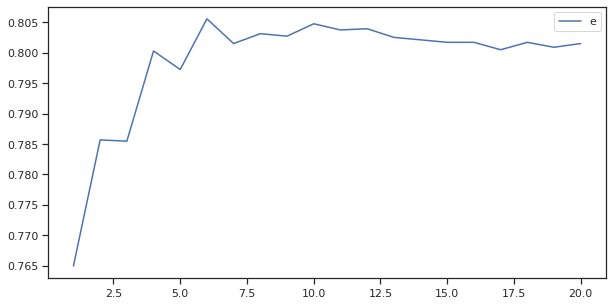

In [ ]:
#Searching for the best n_neighbors:
from sklearn.model_selection import cross_val_score

val_score=[]
k=np.arange(1,21)
for i in k:
    score=cross_val_score(KNeighborsClassifier(i, metric='manhattan'), X_train_knn, Y_train_knn, cv=5, scoring='accuracy')
    val_score.append(score.mean())

plt.figure(figsize=(10,5))
plt.plot(k,val_score)
plt.legend('exemple')
plt.show()

- We Create a dictionary param_grid_knn that contains the two parameters 'criterion' and 'max_depth',for each parameter we have a list of  possible values that we will use to generate different models.

In [ ]:
#Dictionnary of KNeighborsClassifier parameters :
grid_param_knn={'n_neighbors': np.arange(1,20), 'metric': ['euclidean', 'manhattan','minkowski']}

- With the use of GridSearchCV, we will generate different models of KNeighborsClassifier using the different combinations
  taken by the parameters 'n_neighbors' and 'metric'
- The use of 5-fold cross validation:4/5 of the train data will be used to train the model while changing the hyperparameters
  'metric' and 'n_neighbors',and 1/5 of the train data remained will be used to test each model according to the hyperparameters fixed.

In [ ]:
grid=GridSearchCV(KNeighborsClassifier(), grid_param_knn, cv=5) #Instance of the class GridSearchCv


In [ ]:
grid.fit(X_train_knn, Y_train_knn) #training our model

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

- Determine the best values of the parameters 'n_neighbors' and 'metric' that we will fix and use for our model.

In [ ]:
grid.best_score_

0.8055660104824398

--> the best score obtained for the KNeighborsClassifier is : 0.80

In [ ]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
#grid.best_estimator_ return the best parametres in our dictionary grid_param_knn and default values for the other parameters .

In [ ]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 6}

--> the best parameters obtained for the KNeighborsClassifier are : 'metric': 'manhattan', 'n_neighbors': 6

In [ ]:

knn_p=KNeighborsClassifier( metric= 'manhattan', n_neighbors= 6)

- Training our model KNeighborsClassifier by fixing the parameter metric to 'manhattan' and the parameter n_neighborsto  "6" :

In [ ]:
knn_p.fit(X_train_knn, Y_train_knn) #training our model using the best values of the parameters

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
print("The train_score= ", knn_p.score(X_train_knn, Y_train_knn))  #Calculate the train score and the test score of the model dt
print("The test_score= ", knn_p.score(X_test_knn, Y_test_knn))

The train_score=  0.8476229175132061
The test_score=  0.8146919431279621


=> As we can see,after changing the values of the parametrs "manhattan" and "n_neighbors",we obtained a test_score=0.81 which is 
  better than the previous score(=0.79)

In [ ]:
#Learning Curves:


N, train_score, val_score=learning_curve(knn_p, X_train_knn, Y_train_knn, train_sizes=np.linspace(0.1,1,10), cv=5)
print(N)

[ 393  787 1181 1574 1968 2362 2755 3149 3543 3937]


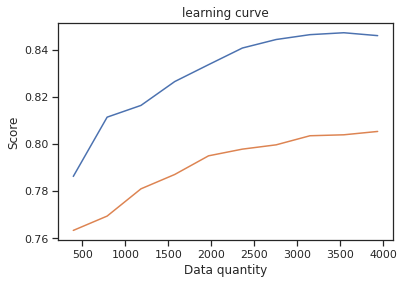

In [ ]:
plt.plot(N, train_score.mean(axis=1), N,val_score.mean(axis=1) )
plt.xlabel('Data quantity')  
plt.ylabel('Score')
plt.title('learning curve')
plt.show()

=> we keep changing the quantity of data used for our model and we vizualize its impact on the test score and the train score.


- Applying our final model to X_test in order to predict the target variable Y: Churn/No Chrun

In [ ]:
Y_pred_knn = knn_p.predict(X_test_knn) #predicting the values of our target variable using KNeighborsClassifier Model

In [ ]:
target_names=['No_Churn', 'Churn']

- Display the confusion_matrix :

In [ ]:
print(confusion_matrix(Y_test_knn, Y_pred_knn)) #Display the confusion matrix of the KNeighborsClassifier Model

[[1472   97]
 [ 294  247]]


=>True Positive: 1472/False Positive: 97/False Negative(we should minimize this value): 295/True Negative:246

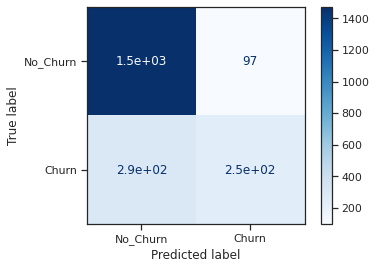

In [ ]:
plot_confusion_matrix(knn_p, X_test_knn, Y_test_knn,display_labels=target_names,cmap=plt.cm.Blues)  
plt.show()

- Visualize the classification report :

In [ ]:
print("The accuracy_score = ", accuracy_score(Y_test_knn, Y_pred_knn))


The accuracy_score =  0.8146919431279621


--> We obtained an accuracy score for KNN model = 0.81 .

In [ ]:
print(classification_report(Y_test_knn, Y_pred_knn)) #Visualize the classification report 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1569
           1       0.72      0.46      0.56       541

    accuracy                           0.81      2110
   macro avg       0.78      0.70      0.72      2110
weighted avg       0.80      0.81      0.80      2110



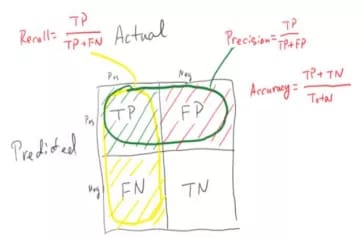

########################################################################
########################################################################
#
########################################################################
#######################################################################################################################################################################################


#### 2) DT : Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier  #Import the model DecisionTreeClassifier from sklearn

In [ ]:
dt = DecisionTreeClassifier(random_state=0)  #Create an instance dt of the class  DecisionTreeClassifier

In [ ]:
dt.fit(X_train , Y_train) # train the model dt  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#displaying the score of the model

print("The train_score= ", dt.score(X_train, Y_train))  #Calculate the train score and the test score of the model dt
print("The test_score= ", dt.score(X_test, Y_test))

The train_score=  0.9973333333333333
The test_score=  0.7221037668798863


--> Using the default value  parameter , gives us 0.72 as a score.

In [ ]:
from sklearn.model_selection import GridSearchCV  #import of GridSearchCV

- We Create a dictionary param_grid that contains the two parameters 'criterion' and 'max_depth',for each parameter we have a list of  possible values that we will use to generate different models.

In [ ]:

#Dictionnary of DecisionTreeClassifier parameters :
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,10)}


- With the use of GridSearchCV, we will generate different models of DecisionTreeClassifier using the different combinations
  taken by the parameters 'criterion' and 'max_depth'
- The use of 5-fold cross validation:4/5 of the train data will be used to train the model while changing the hyperparameters
  'criterion' and 'max_depth',and 1/5 of the train data remained will be used to test each model according to the hyperparameters fixed.

In [ ]:
grid =GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=param_grid, cv=5 ) #Instance of the class GridSearchCv


In [ ]:
grid.fit(X_train, Y_train) #training our model

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8,

- Determine the best values of the parameters 'criterion' and 'max_depth' that we will fix and use for our model.

In [ ]:
grid.best_score_

0.7907555555555554

--> the best score obtained for the DecisionTree is : 0.79

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7}

--> the best parameters obtained for the KNeighborsClassifier are : 'criterion': 'gini', 'max_depth': 7

In [ ]:
dt=DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=7)



- Training our model DecisionTree by fixing the parameter "criterion" to "gini" and the parameter "max_depth" to "7" :

In [ ]:
dt.fit(X_train, Y_train) #training our model using the best values of the parameters


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
print("The train_score= ", dt.score(X_train, Y_train))  #Calculate the train score and the test score of the model dt
print("The test_score= ", dt.score(X_test, Y_test))

The train_score=  0.8279111111111112
The test_score=  0.7782515991471215


=> As we can see,after changing the values of the parametrs "manhattan" and "n_neighbors",we obtained a test_score=0.81 which is 
  better than the previous score(=0.79)

In [ ]:
#Learning Curves:
from sklearn.model_selection import learning_curve

N, train_score, val_score=learning_curve(dt, X_train, Y_train, train_sizes=np.linspace(0.1,1,10), cv=5)
print(N)

[ 450  900 1350 1800 2250 2700 3150 3600 4050 4500]


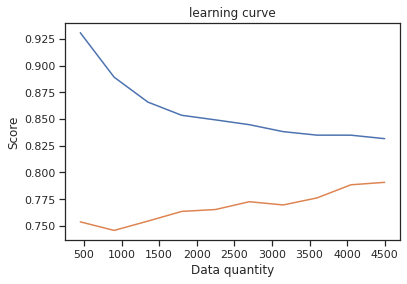

In [ ]:
plt.plot(N, train_score.mean(axis=1), N,val_score.mean(axis=1) )
plt.xlabel('Data quantity')  
plt.ylabel('Score')
plt.title('learning curve')
plt.show()

=> we keep changing the quantity of data used for our model and we vizualize its impact on the test score and the train score.


- Applying our final model to X_test in order to predict the target variable Y: Churn/No Chrun

In [ ]:
Y_pred = dt.predict(X_test) #predicting the values of our target variable using DecisionTree Model

In [ ]:
target_names=['No_Churn', 'Churn']

- Display the confusion_matrix :

In [ ]:
print(confusion_matrix(Y_test, Y_pred)) #Display the confusion matrix of the DecisionTree Model

[[928 110]
 [202 167]]


=>True Positive: 1472/False Positive: 97/False Negative(we should minimize this value): 295/True Negative:246

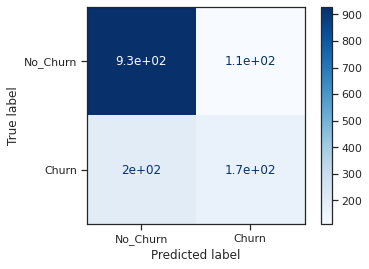

In [ ]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(dt, X_test, Y_test,display_labels=target_names,cmap=plt.cm.Blues)  
plt.show()

- Visualize the classification report :

In [ ]:
print("The accuracy_score = ", accuracy_score(Y_test, Y_pred))


The accuracy_score =  0.7782515991471215


--> We obtained an accuracy score for DecisionTree model = 77 .

In [ ]:
print(classification_report(Y_test, Y_pred)) #Visualize the classification report 

              precision    recall  f1-score   support

          No       0.82      0.89      0.86      1038
         Yes       0.60      0.45      0.52       369

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.78      0.77      1407



 - Display The Decision Tree

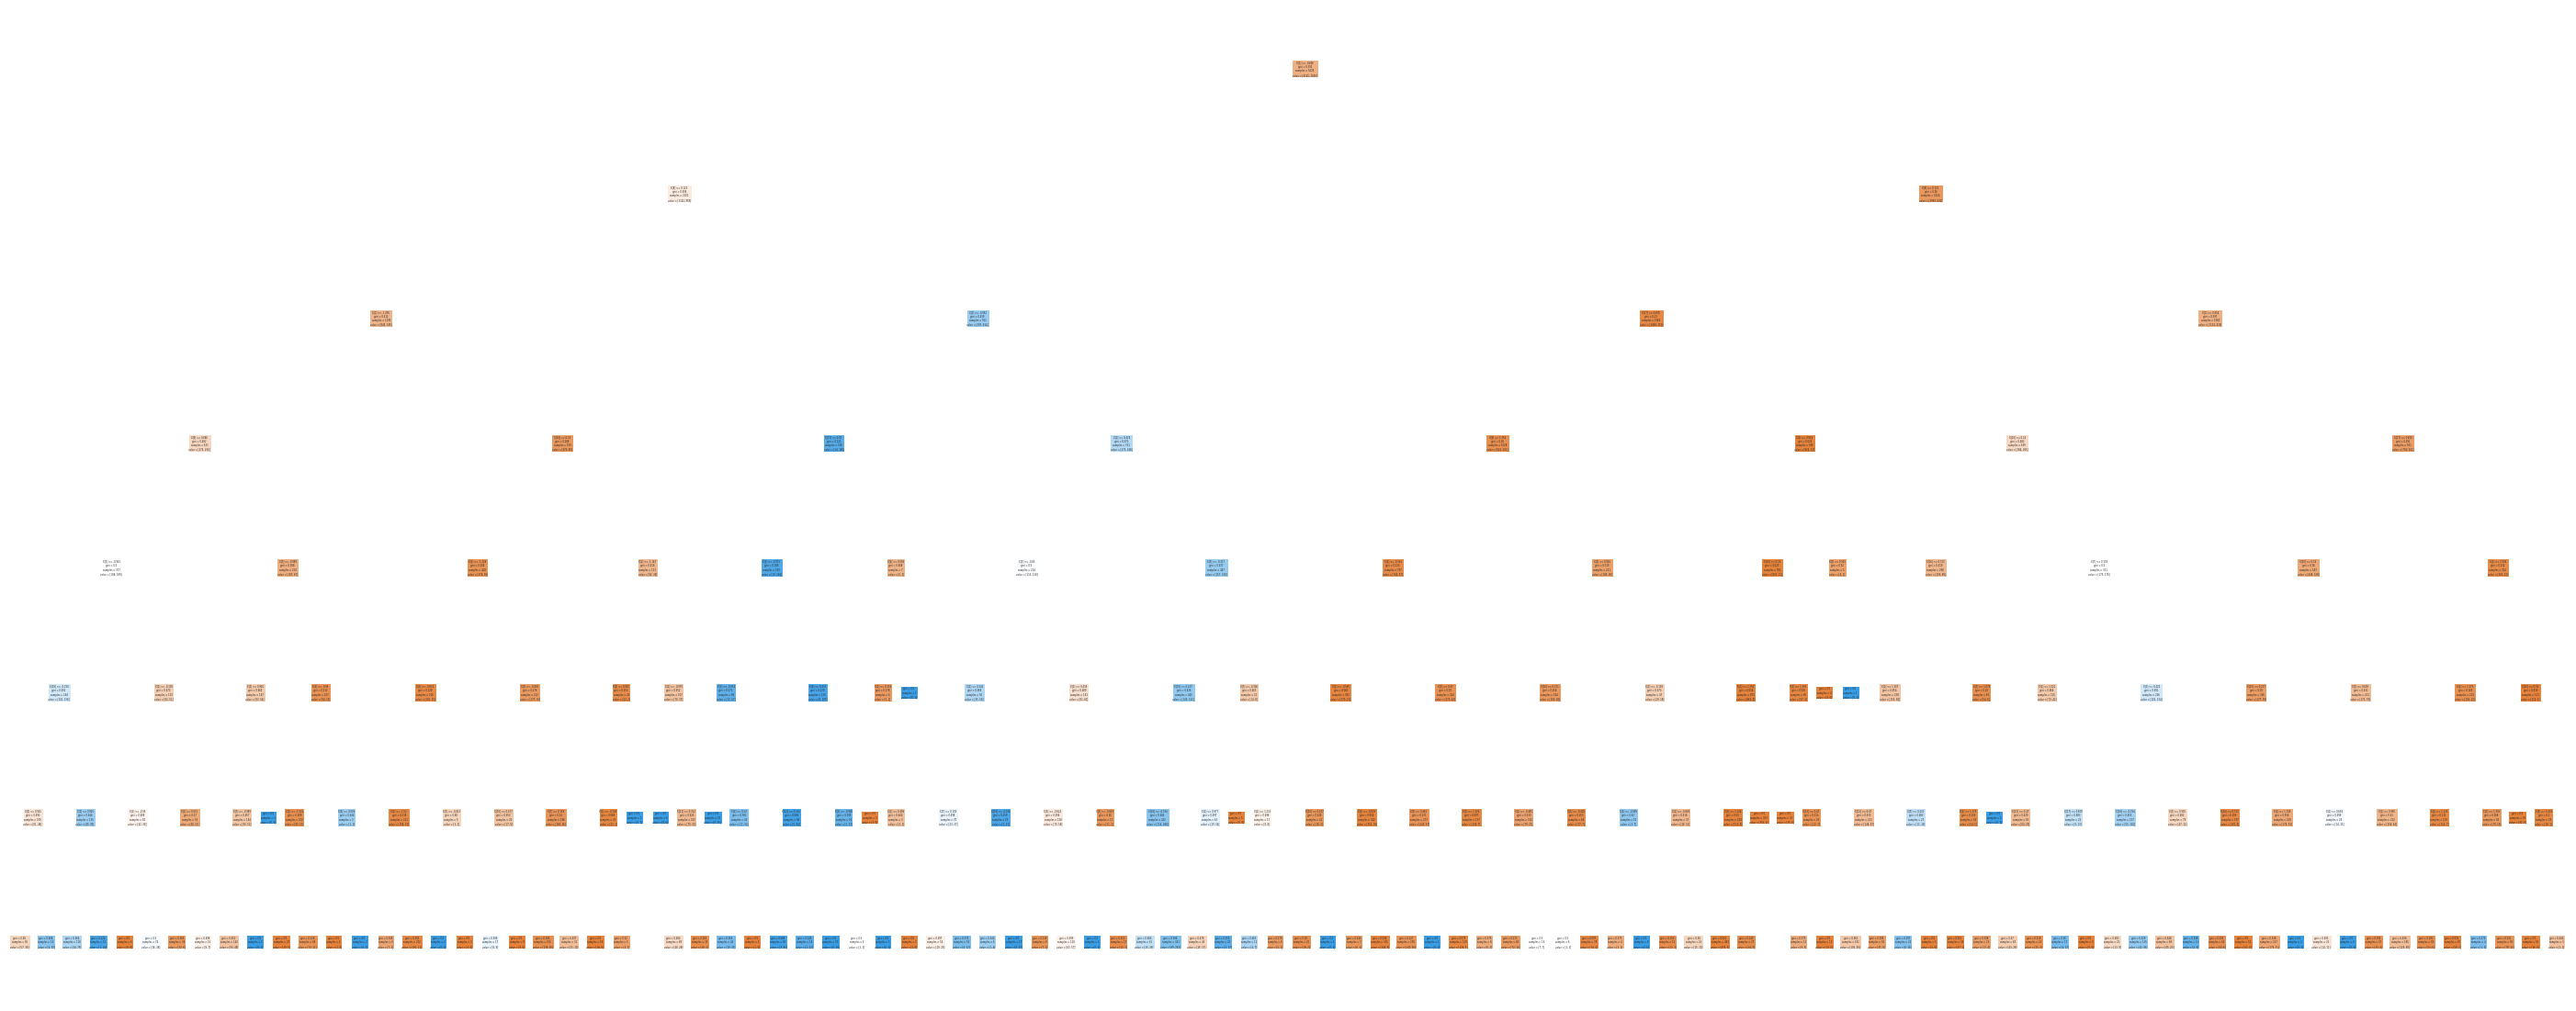

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,20))
plot_tree(dt ,filled=True )
plt.show()

In [ ]:
from sklearn.tree import export_text  #import export_text
print(export_text(dt))

|--- feature_1 <= -0.61
|   |--- feature_8 <= 0.12
|   |   |--- feature_1 <= -1.09
|   |   |   |--- feature_9 <= 0.69
|   |   |   |   |--- feature_3 <= -0.95
|   |   |   |   |   |--- feature_18 <= -0.19
|   |   |   |   |   |   |--- feature_0 <= 0.92
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  0.92
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_18 >  -0.19
|   |   |   |   |   |   |--- feature_0 <= 0.92
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  0.92
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  -0.95
|   |   |   |   |   |--- feature_2 <= -0.31
|   |   |   |   |   |   |--- feature_3 <= -0.95
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  -0.95
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  -0.31
|   |   |   |   |   |   |--- feature_2 <= 0.03
|   |   |   |   |   |   |   |--- class: 0

# ########################################################################
########################################################################
#
########################################################################
#######################################################################################################################################################################################

#### 3) Random Forest Classifier:


In [1]:
from sklearn.ensemble import RandomForestClassifier #Import the model RandomForestClassifier from sklearn

In [2]:
#Create an instance dt of the class RandomForestClassifier
Model = RandomForestClassifier() # without specificate the parameter

In [3]:
#Training the model
Model.fit(X_train, Y_train)

NameError: ignored

In [ ]:
#displaying the score of the model

print("The train_score= ", Model.score(X_train,Y_train))  #Calculate the train score and the test score of the model dt
print("The test_score= ", Model.score(X_test,Y_test))

--> Using the default value parameters , gives us 0.783 as a score.

Parameters of RandomForestClassifier :

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False] #If False, the whole dataset is used to build each tree.


In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

- With the use of GridSearchCV, we will generate different models of RandomForestClassifier using the different combinations
  taken by the parameters 'n_estimators' and 'max_features'and 'min_samples_split'and 'bootstrap'
- The use of 5-fold cross validation:4/5 of the train data will be used to train the model while changing the hyperparameters
  'and 1/5 of the train data remained will be used to test each model according to the hyperparameters fixed.

In [ ]:
rf_Grid = GridSearchCV(estimator = Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4) #Instance of the class GridSearchCv

In [ ]:
rf_Grid.fit(X_train, Y_train) #training our model

- Determine the best values of the parameters  that we will fix and use for our model.

In [ ]:
rf_Grid.best_score_

--> the best score obtained for the DecisionTree is : 0.794

In [ ]:
rf_Grid.best_estimator_

In [ ]:
rf_Grid.best_params_

--> the best parameters obtained for the RandomForestClassifier are : 'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10


- Training our model RandomForestClassifier by fixing the best parameters 

In [ ]:
rd=RandomForestClassifier(bootstrap=True,
 max_depth= 4,
 max_features= 'auto',
 min_samples_leaf=2,
 min_samples_split= 5,
 n_estimators= 10)

- Training our model RandomForest by fixing the parameters :

In [ ]:
rd.fit(X_train, Y_train) #training our model using the best values of the parameters

- Calculate the score of our final model :

In [ ]:
print('the train_score=', rd.score(X_train, Y_train)) #calculate the train score
print('the test_score=', rd.score(X_test, Y_test))    #calculate the test score

=> As we can see,after changing the values of the parametrs ,we obtained a test_score=0.791 which is better than the previous score(=0.783)

In [ ]:
#Learning Curves:
from sklearn.model_selection import learning_curve

N, train_score, val_score=learning_curve(rd, X_train, Y_train, train_sizes=np.linspace(0.1,1,10), cv=5)
print(N)

In [ ]:
plt.plot(N, train_score.mean(axis=1), N,val_score.mean(axis=1) )
plt.xlabel('Data quantity')  
plt.ylabel('Score')
plt.title('learning curve')
plt.show()

=> we keep changing the quantity of data used for our model and we vizualize its impact on the test score and the train score.


- Applying our final model to X_test in order to predict the target variable Y: Churn/No Chrun

In [ ]:
Y_pred = rd.predict(X_test) #predicting the values of our target variable using DecisionTree Model

In [ ]:
target_names=['No_Churn', 'Churn']

- Display the confusion_matrix :

In [ ]:
print(confusion_matrix(Y_test, Y_pred)) #Display the confusion matrix of the DecisionTree Model

=>True Positive: 969/False Positive: 69/False Negative(we should minimize this value): 221/True Negative:148

In [ ]:

plot_confusion_matrix(rd, X_test, Y_test,display_labels=target_names,cmap=plt.cm.Blues)  
plt.show()

- Visualize the classification report :

In [ ]:
print("The accuracy_score = ", accuracy_score(Y_test, Y_pred))


--> We obtained an accuracy score for DecisionTree model = 0.791 .

In [ ]:
print(classification_report(Y_test, Y_pred)) #Visualize the classification report 

# ########################################################################
########################################################################
#
########################################################################
#######################################################################################################################################################################################

#### 4)  KMEANS  :

In [ ]:
from sklearn import preprocessing  #Import the model preprocessing from sklearn
from sklearn.metrics import accuracy_score, confusion_matrix    #Import the  accuracy_score, confusion_matrix model  from sklearn


- Assign number of clusters required. Here, 2 since only two classes

In [ ]:
n_clusters = 2 # we have 2 clusters (churn /not churn)

In [ ]:
y=pd.get_dummies( Y ,drop_first=True) #converting Y to num val


In [ ]:

Xkm = preprocessing.normalize(X, norm = "l2")

In [ ]:
clusterer = KMeans(n_clusters = n_clusters) # Initialize the clusterer with n_clusters value

In [ ]:
cluster_labels = clusterer.fit_predict(Xkm) #Training the model


In [ ]:


print("For n_clusters = 2 . The accuracy_score is :", accuracy_score(y, cluster_labels))


For n_clusters = 2 . The accuracy_score is : 0.7565415244596132


--> Using the default value parameters , gives us 0.75  as a score.

In [ ]:
clusterer2 = KMeans(init='k-means++',n_clusters = n_clusters, n_init=10) #  the clusterer with 
                                                                         #    init='k-means++'  n_init=10
cluster1_labels2 = clusterer2.fit_predict(Xkm)


print("For n_clusters = 2 . The accuracy_score is :", accuracy_score(y, cluster1_labels2))

For n_clusters = 2 . The accuracy_score is : 0.2434584755403868


--> we got the same accuracy_score despite of changing parametres whit n_clusters = 2 .

In [ ]:
target_names=['No_Churn', 'Churn']

- Display the confusion_matrix :

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix
con_m= confusion_matrix(y, cluster_labels)
print(con_m)

[[4816  347]
 [1365  504]]


=>True Positive: 4816 /False Positive: 347/ False Negative(we should minimize this value): 1365/ True Negative:504

Text(66.5, 0.5, 'True values')

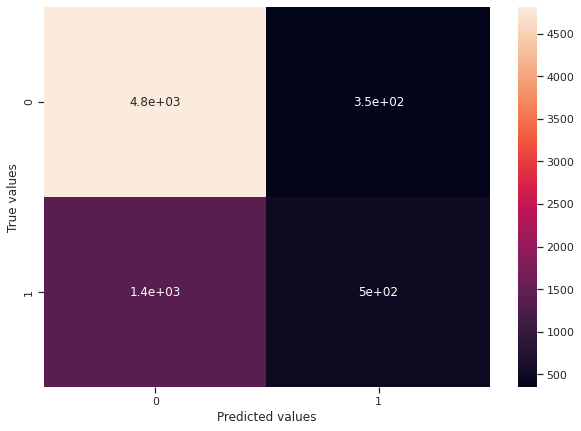

In [ ]:
import matplotlib.pyplot as plt #'Pyplot' is intended for interactive plots and simple cases of programmatic plot generation
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap (con_m, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')

In [ ]:
y_test=pd.get_dummies( Y_test ,drop_first=True)
y_train=pd.get_dummies( Y_train ,drop_first=True)
Y_predicted= clusterer.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_predicted, digits=6))

              precision    recall  f1-score   support

           0   0.849537  0.707129  0.771819      1038
           1   0.440147  0.647696  0.524123       369

    accuracy                       0.691542      1407
   macro avg   0.644842  0.677413  0.647971      1407
weighted avg   0.742170  0.691542  0.706858      1407



 - The silhouette_score gives the average value for all the samples.
   This gives a perspective into the density and separation of the formed
   clusters

For n_clusters = 2 The average silhouette_score is : 0.8540182094721318


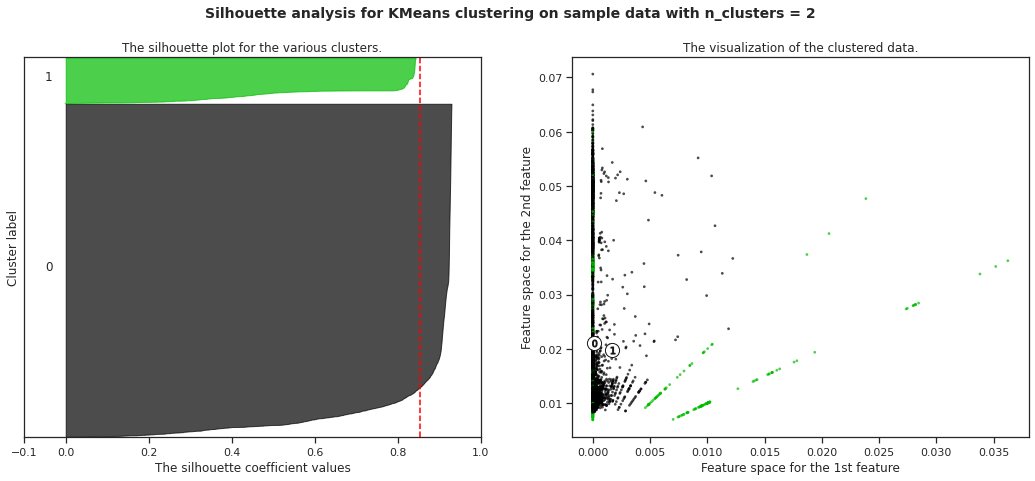

In [ ]:
import matplotlib.cm as cm



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(Xkm) + (n_clusters + 1) * 10])



silhouette_avg = silhouette_score(Xkm, cluster_labels)

print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(Xkm, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(Xkm[:, 0], Xkm[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

# ########################################################################
########################################################################
#
########################################################################
#######################################################################################################################################################################################


#### 5)  Classification using Multi-layer perceptron   :

In [ ]:
from sklearn.neural_network import MLPClassifier #Import of MLPClassifier model from sklearn 


In [ ]:
ann2 = MLPClassifier()  #Create an instance dt of the class  MLPClassifier

In [ ]:
ann2.fit(X_train, y_train) # train the model dt 
y_train=pd.get_dummies( Y_train ,drop_first=True)
y_test=pd.get_dummies( Y_test ,drop_first=True)
prediction2 = ann2.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#displaying the score of the model
from sklearn.metrics import accuracy_score, mean_squared_error as mse  #Import the  accuracy_score, me

#Calculate the train score and the test score of the model dt
print("Mean-squared error using Neural networks MLP:", mse(y_test, prediction2))
print("Accuracy with Neural networks MLP:",accuracy_score(y_test, prediction2))



Mean-squared error using Neural networks MLP: 0.20611229566453448
Accuracy with Neural networks MLP: 0.7938877043354655


- --> Using the default values the parameter MLPClassifier , gives us 0.79 as a score.

In [ ]:
from sklearn.model_selection import GridSearchCV  #import of GridSearchCV

- Creating of dictionary param_ML that contains the two parameters 'hidden_layer_sizes' , 'activation','solver', 'alpha' and 'learning_rate'for each parameter we have a list of possible values that we will use to generate different models.

In [ ]:
param_ML = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
param_ML

{'activation': ['tanh', 'relu'],
 'alpha': [0.0001, 0.05],
 'hidden_layer_sizes': [(10, 30, 10), (20,)],
 'learning_rate': ['constant', 'adaptive'],
 'solver': ['sgd', 'adam']}

- Determine the best values of the parameters best_param_ML that we will fix and use for our model  :

In [ ]:
ML = MLPClassifier()
best_param_ML = GridSearchCV(ML, param_ML, cv=3, n_jobs=-1) 

In [ ]:
best_param_ML .fit(X_train, y_train)  #Training our model  using  best_param_ML   :

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

- Determine the best values of the parameters 'activation' and 'alpha'and 'hidden_layer_sizes' and  'learning_rate ' and 'solver 'that we will fix and use for our model.

In [ ]:
best_param_ML.best_score_

0.8039111111111111

--> the best score obtained for the MLPClassifier is : 0.806

In [ ]:
best_param_ML.best_estimator_

MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
best_param_ML.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (20,),
 'learning_rate': 'constant',
 'solver': 'adam'}

--> the best parameters obtained for the MLPClassifier are : 
{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (20,),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

- Calculate the score of our final model

In [ ]:
pred=best_param_ML.predict(X_test)


- Training our model DecisionTree by fixing the best parameters :

In [ ]:
pred=best_param_ML.predict(X_test)#predicting the values of our target variable using MLPClassifier Model
acc = accuracy_score(y_test,pred) 


In [ ]:
print('accuracy_score',acc)
Acc_ML = acc

accuracy_score 0.8045486851457001


we obtained a accura core=0.808 which is better than the previous score(=we obtained a accura core=0.805 which is better than the previous score(=0.791)

- Applying our final model to X_test in order to predict the target variable Y: Churn/No Chrun

In [ ]:
target_names=['No_Churn', 'Churn']

- Display the confusion_matrix :

In [ ]:
print(confusion_matrix(y_test, pred)) #Display the confusion matrix of the MLPClassifier Model

[[937 101]
 [174 195]]


=>True Positive: 1472/False Positive: 97/False Negative(we should minimize this value): 295/True Negative:246

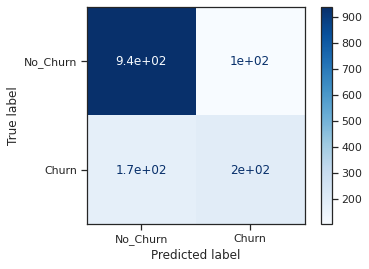

In [ ]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(best_param_ML, X_test, y_test,display_labels=target_names,cmap=plt.cm.Blues)  
plt.show()

- Visualize the classification report :

In [ ]:
print("The accuracy_score = ", accuracy_score(y_test, pred))


The accuracy_score =  0.8045486851457001


--> We obtained an accuracy score for DecisionTree model = 77 .

In [ ]:
print(classification_report(y_test, pred)) #Visualize the classification report 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.66      0.53      0.59       369

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



## ########################################################################
########################################################################
#
########################################################################
#######################################################################################################################################################################################

#### 7) SVM

In [ ]:
from sklearn.svm import SVC #Import the model SVC from sklearn.svm

In [ ]:

y_test_svm=pd.get_dummies( Y_test ,drop_first=True)# converting y to num val 
y_train_svm=pd.get_dummies( Y_train ,drop_first=True) # converting y to num val

In [ ]:
#Instance of the SVM
#choosing the rbf kernel 
svc_rbf = SVC(kernel = "rbf")

In [ ]:
#Training the model
svc_rbf = svc_rbf.fit(X_train,y_train_svm)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#displaying the score of the model
print("The train_score= ", svc_rbf.score(X_train,y_train_svm))  #Calculate the train score and the test score of the model SVM
print("The test_score= ", svc_rbf.score(X_test, y_test_svm))

The train_score=  0.8145777777777777
The test_score=  0.7995735607675906


In [ ]:
svc_p= SVC(kernel = 'linear')
svc_p.fit(X_train, y_train_svm) #training our model using the  parameter kernel='linear'

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("The train_score= ", svc_p.score(X_train, y_train_svm))  #Calculate the train score and the test score of the model SVM
print("The test_score= ", svc_p.score(X_test, y_test_svm))

The train_score=  0.7985777777777778
The test_score=  0.798862828713575


=> As we can see,after changing the values of the parametre to kernel='linear' ,we obtained a test_score=0.798 which is 
  roughly same as the previous score(=0.799)

In [ ]:
#Learning Curves:


N, train_score, val_score=learning_curve(svc_rbf, X_train, y_train_svm, train_sizes=np.linspace(0.1,1,10), cv=5)
print(N)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[ 450  900 1350 1800 2250 2700 3150 3600 4050 4500]


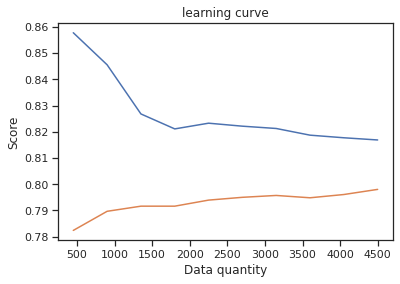

In [ ]:
plt.plot(N, train_score.mean(axis=1), N,val_score.mean(axis=1) )
plt.xlabel('Data quantity')  
plt.ylabel('Score')
plt.title('learning curve')
plt.show()

=> we keep changing the quantity of data used for our model and we vizualize its impact on the test score and the train score.


- Applying our final model to X_test in order to predict the target variable Y: Churn/No Chrun

In [ ]:
y_pred_svm = svc_rbf.predict(X_test) #predicting the values of our target variable using SVM Model

In [ ]:
target_names=['No_Churn', 'Churn']

- Display the confusion_matrix :

In [ ]:
print(confusion_matrix(y_test_svm, y_pred_svm)) #Display the confusion matrix of the SVM Model

[[944  94]
 [188 181]]


=>True Positive: 944/False Positive: 94/False Negative(we should minimize this value): 188/True Negative:181

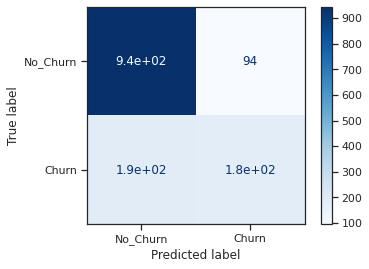

In [ ]:
plot_confusion_matrix(svc_rbf, X_test, y_test_svm,display_labels=target_names,cmap=plt.cm.Blues)  
plt.show()

- Visualize the classification report :

In [ ]:
print("The accuracy_score = ", accuracy_score(y_test_svm, y_pred_svm))


The accuracy_score =  0.7995735607675906


--> We obtained an accuracy score for SVM model = 0.799 .

In [ ]:
print(classification_report(y_test_svm, y_pred_svm)) #Visualize the classification report 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.66      0.49      0.56       369

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



# ########################################################################
########################################################################
#
########################################################################
#######################################################################################################################################################################################


#### 6) Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB #Import the model Naive Bayes from sklearn.naive_bayes
from sklearn.model_selection import cross_val_score


In [ ]:
#Instance of the class GaussianNB
model_NB=GaussianNB()

In [ ]:
#Training the model
model_NB.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#displaying the score of the model
print("The train_score= ", model_NB.score(X_train, Y_train))  #Calculate the train score and the test score of the model naive bayes
print("The test_score= ", model_NB.score(X_test, Y_test))

The train_score=  0.7527111111111111
The test_score=  0.744136460554371


- We Create a dictionary param_grid_NB that contains the three parameters GaussianNB(), BernoulliNB(),MultinomialNB().

In [ ]:
#Dictionnary of Naive Bayes parameters :
grid_param_NB={'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(), 'multinomial':MultinomialNB()}

In [ ]:

scores = {}
for key, model in grid_param_NB.items():
    s = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Negative values in data passed to MultinomialNB (input X)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFa

{'bernoulli': 0.7802666666666667,
 'gaussian': 0.7521777777777778,
 'multinomial': nan}

- With the use of GridSearchCV, we will generate different models of   KNeighborsClassifier using the different combinations
  taken by the parameters 'n_neighbors' and 'metric'
- The use of 5-fold cross validation:4/5 of the train data will be used to train the model while changing the hyperparameters
  'metric' and 'n_neighbors',and 1/5 of the train data remained will be used to test each model according to the hyperparameters fixed.

--> the best parameters obtained for the Naive Bayes are : 'bernoulli': 0.7802666666666667

In [ ]:
model_NB_p=BernoulliNB()

- Training our model naive bayes by using BernoulliNB() methode :

In [ ]:
model_NB_p.fit(X_train,Y_train) #training our model using the best values of the parameters
predictions = model_NB_p.predict(X_test)

In [ ]:
print("The train_score= ", model_NB_p.score(X_train, Y_train))  #Calculate the train score and the test score of the model naive bayes
print("The test_score= ", model_NB_p.score(X_test, Y_test))

The train_score=  0.7813333333333333
The test_score=  0.775408670931059


=> As we can see,after using the BernoulliNB() methode ,we obtained a test_score=0.77 

In [ ]:
#Learning Curves:
N, train_score, val_score=learning_curve(model_NB_p, X_train, Y_train, train_sizes=np.linspace(0.1,1,10), cv=5)
print(N)

[ 450  900 1350 1800 2250 2700 3150 3600 4050 4500]


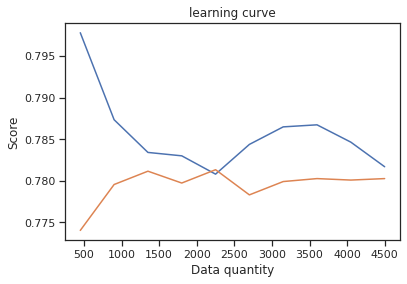

In [ ]:
plt.plot(N, train_score.mean(axis=1), N,val_score.mean(axis=1) )
plt.xlabel('Data quantity')  
plt.ylabel('Score')
plt.title('learning curve')
plt.show()

=> we keep changing the quantity of data used for our model and we vizualize its impact on the test score and the train score.


- Applying our final model to X_test in order to predict the target variable Y: Churn/No Chrun

In [ ]:
Y_pred = model_NB_p.predict(X_test) #predicting the values of our target variable 

In [ ]:
target_names=['No_Churn', 'Churn']

- Display the confusion_matrix :

In [ ]:
print(confusion_matrix(Y_test, Y_pred)) #Display the confusion matrix

[[853 185]
 [131 238]]


=>True Positive: 853/False Positive: 185/False Negative(we should minimize this value): 131/True Negative:238

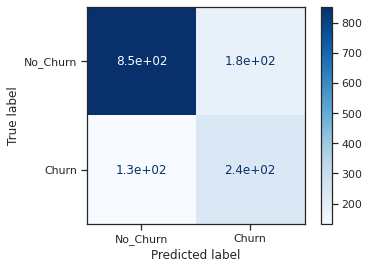

In [ ]:
plot_confusion_matrix(model_NB_p, X_test, Y_test,display_labels=target_names,cmap=plt.cm.Blues)  
plt.show()

- Visualize the classification report :

In [ ]:
print("The accuracy_score = ", accuracy_score(Y_test, Y_pred))


The accuracy_score =  0.775408670931059


--> We obtained an accuracy score for naive bayes model = 0.77 .

In [ ]:
print(classification_report(Y_test, Y_pred)) #Visualize the classification report 

              precision    recall  f1-score   support

          No       0.87      0.82      0.84      1038
         Yes       0.56      0.64      0.60       369

    accuracy                           0.78      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407



# ########################################################################
########################################################################
#
########################################################################
#######################################################################################################################################################################################


#### 8) Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from pandas import DataFrame




####from sklearn.metrics import accuracy_score, mean_squared_error as mse 
#logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)
print("Mean-squared error using Logistic Regression:", mse(y_test, prediction))
print("Accuracy with Logistic Regression:",accuracy_score(y_test, prediction))

In [ ]:
y_test=pd.get_dummies( Y_test ,drop_first=True)
y_train=pd.get_dummies( Y_train ,drop_first=True) 

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#normaliser avec StandardScaler

In [ ]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)
#Créer une instance instancier logreg de la classe LogisticRegression en fixant à zéro random_state
# entrainer logreg

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import  plot_confusion_matrix, classification_report

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print("Accuracy with Logistic Regression:",accuracy_score(y_test, y_pred))

Accuracy with Logistic Regression: 0.8073916133617626


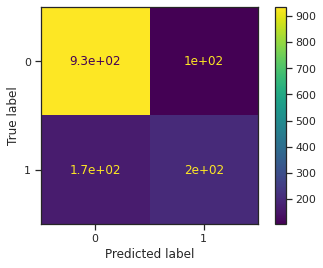

In [ ]:
plot_confusion_matrix(logreg,X_test, y_test)
# tracer la matrice de confusion

In [ ]:
print(classification_report(y_test, y_pred, digits=6))
# rapport de classification

              precision    recall  f1-score   support

           0   0.848320  0.899807  0.873305      1038
           1   0.660131  0.547425  0.598519       369

    accuracy                       0.807392      1407
   macro avg   0.754225  0.723616  0.735912      1407
weighted avg   0.798965  0.807392  0.801240      1407



In [ ]:
y_scores = logreg.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

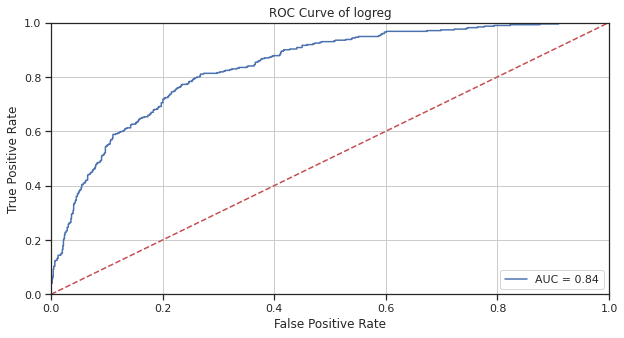

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of logreg')
plt.grid(True)
plt.show()
# courbe roc et auc

In [ ]:
log = LogisticRegression(random_state=0)
#Créer une instance instancier log de la classe LogisticRegression en fixant à zéro random_state


In [ ]:
param_grid ={'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
#Creating the dictionary of parameters

In [ ]:
#from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
#grid = GridSearchCV(log, param_grid = param_grid, cv = 5, n_jobs=-1)
grid = GridSearchCV(log, param_grid = param_grid,scoring = 'recall')
#Créer une instance de recherche par grille appliquée sur l'algorithme de classification par regression logistique

In [ ]:
grid.fit(X_train, y_train)
# entrainer le modele

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [ ]:
grid.best_params_
#best parametres

{'C': 1, 'penalty': 'l2'}

In [ ]:
grid.best_score_
# best score

0.5506666666666667

In [ ]:
final_model = LogisticRegression(C= 0.21052631578947345, max_iter=100, penalty='l1', solver= 'saga')
# modele final

In [ ]:
final_model.fit(X_train, y_train)
# entrainer le modele final

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.21052631578947345, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = final_model.predict(X_test)
#y_pred du model final

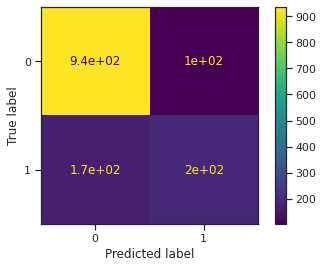

In [ ]:
plot_confusion_matrix(final_model,X_test, y_test)
plt.show()
# matrices de confusion du model final

In [ ]:
y_scores = final_model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

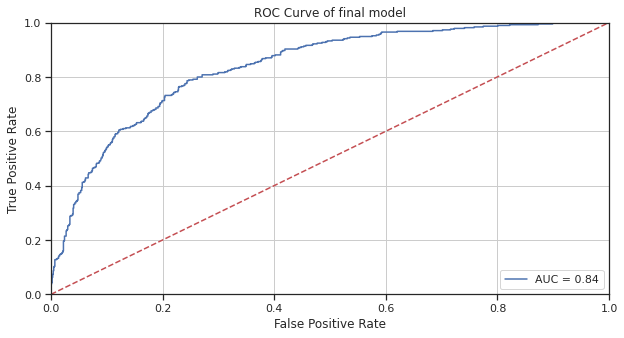

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()
# courbe roc et auc

# ########################################################################
########################################################################
#
########################################################################
#######################################################################################################################################################################################


#### 9) AdaBoostClassifier

In [ ]:
import sklearn #import sklearn
from sklearn.ensemble import AdaBoostClassifier #import AdaBoostClassifier

In [ ]:
AdaModel= AdaBoostClassifier(n_estimators=100,learning_rate=1) #Create an instance of the class AdaBoostClassifier

- parameters:
- n_estimators:number of weak learners to train iteratively
- learning_rate:it contributes to the rate of weak learners.It uses 1 as a default value 

- Training our model

In [ ]:
#train AdobeBoostClassifier
model=AdaModel.fit(X_train,Y_train)

- Applying our model to X_test in order to predict the target variable Y: Churn/No Churn

In [ ]:
Y_predict=AdaModel.predict(X_test) #predict the response for test dataset

In [ ]:
from sklearn import metrics #import metrics

In [ ]:
#Model Accuracy
print("Accuracy:",metrics.accuracy_score(Y_test,Y_predict))

Accuracy: 0.8031272210376688


=>Our model gave us an accuracy=0.803

- Display the confusion matrix

In [ ]:
target_names=['No_Churn', 'Churn']

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_predict))

[[935 103]
 [174 195]]


=>True Positive:935/False Positive:103/False Negative(we should minimize this value):174/True Negative:195.

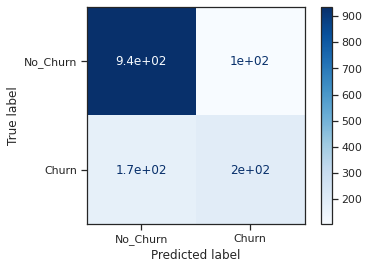

In [ ]:
target_names=['No_Churn', 'Churn'] 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(AdaModel, X_test, Y_test,display_labels=target_names,cmap=plt.cm.Blues)  
plt.show()

- Import the classification report 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict, digits=6))

              precision    recall  f1-score   support

          No   0.843102  0.900771  0.870983      1038
         Yes   0.654362  0.528455  0.584708       369

    accuracy                       0.803127      1407
   macro avg   0.748732  0.714613  0.727845      1407
weighted avg   0.793603  0.803127  0.795904      1407



######

# ########################################################################
########################################################################
#
########################################################################
#######################################################################################################################################################################################

### 10) XGBoost

In [ ]:
#pip install xgboost
from xgboost import XGBClassifier #Import the model XGBClassifier from sxgboost

In [ ]:
#Instance of the class XGBoost
boost = XGBClassifier()  

In [ ]:
#Training the model
boost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#displaying the score of the model
print("The train_score= ", boost.score(X_train, Y_train))  #Calculate the train score and the test score of the model XGBClassifier()
print("The test_score= ", boost.score(X_test, Y_test))

The train_score=  0.8232888888888888
The test_score=  0.8045486851457001


In [ ]:
# booster [default= gbtree ] Which booster to use. Can be gbtree, gblinear or dart; gbtree and dart use tree based models while gblinear uses linear functions.
# max_depth [default=6], Maximum depth of a tree (les niveau de l'arbre)
# n_estimators=100 [default=100] nombre des arbres chaque arbre est un model 
# learning_rate [default=0.3] increase the learning rate makes the algorithme learns faster; take a percentage of your resudial and and add it back to the boosting tree; if you encrease it too much it may not converge and end up with poor accuracy 
# subsample [default=1] ; Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration. range: (0,1]
boost_p = XGBClassifier(booster='gbtree',max_depth=4, n_estimators=150, learning_rate=0.08,subsample=1 )


- Training our model Xgboost by fixing the parameter :

In [ ]:
boost_p.fit(X_train, Y_train) #training our model using the best values of the parameters

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print("The train_score= ", boost_p.score(X_train, Y_train))  #Calculate the train score and the test score of the model XGBoost
print("The test_score= ", boost_p.score(X_test, Y_test))

The train_score=  0.8359111111111112
The test_score=  0.8045486851457001


=> As we can see,after changing the values of the parametrs "booster" , "max_depth","n_estimators", "learning_rate" and "subsample", ,we obtained a test_score=0.80 which is 
  better than the previous score(=0.79)

In [ ]:
#Learning Curves:
N, train_score, val_score=learning_curve(boost_p, X_train, Y_train, train_sizes=np.linspace(0.1,1,10), cv=5)
print(N)

[ 450  900 1350 1800 2250 2700 3150 3600 4050 4500]


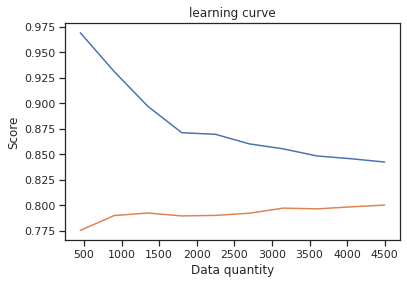

In [ ]:
plt.plot(N, train_score.mean(axis=1), N,val_score.mean(axis=1) )
plt.xlabel('Data quantity')  
plt.ylabel('Score')
plt.title('learning curve')
plt.show()

=> we keep changing the quantity of data used for our model and we vizualize its impact on the test score and the train score.


- Applying our final model to X_test in order to predict the target variable Y: Churn/No Chrun

In [ ]:
Y_pred_XG = boost_p.predict(X_test) #predicting the values of our target variable using XGBoost Model

In [ ]:
target_names=['No_Churn', 'Churn']

- Display the confusion_matrix :

In [ ]:
print(confusion_matrix(Y_test, Y_pred_XG)) #Display the confusion matrix of the XGBoost Model

[[942  96]
 [179 190]]


=>True Positive: 942/False Positive: 96/False Negative(we should minimize this value): 179/True Negative:190

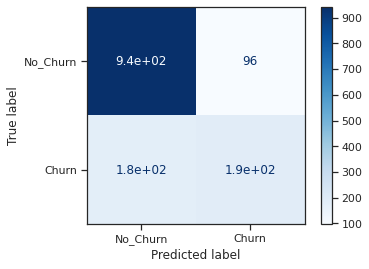

In [ ]:
plot_confusion_matrix(boost_p, X_test, Y_test,display_labels=target_names,cmap=plt.cm.Blues)  
plt.show()

- Visualize the classification report :

In [ ]:
print("The accuracy_score = ", accuracy_score(Y_test, Y_pred_XG))


The accuracy_score =  0.8045486851457001


--> We obtained an accuracy score for XGBoost model = 0.80 .

In [ ]:
print(classification_report(Y_test, Y_pred_XG)) #Visualize the classification report 

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1038
         Yes       0.66      0.51      0.58       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.80      1407



# ########################################################################
########################################################################
#
########################################################################
#######################################################################################################################################################################################


### Model performances over the training dataset :

In [ ]:
#defining the studied or used independent features (columns) as well the target 
target_col = ["Churn"]
cols = [i for i in data.columns if i not in target_col]



#putting all the model names, model classes and the used columns in a dictionary
models = {  'Logistic regression': [log, cols],
          'Decision Tree': [dt, cols], 
          'KNN Classifier': [knn_p, cols], 
          'Random Forest': [rd, cols], 
          'Naive Bayes': [model_NB_p, cols], 
          'SVM (rbf)': [svc_rbf, cols], 
          'AdaBoost': [AdaModel, cols], 
          'MLP Classifier': [ML, cols], 
          'Kmeans': [clusterer2, cols],
          'Xgboost':[boost,cols]
         }

 1. Model performance metrics :

In [ ]:

def model_report(model, training_x, testing_x, training_y, testing_y, name):
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    accuracy = accuracy_score(testing_y, predictions)
    recallscore = recall_score(testing_y, predictions)
    precision = precision_score(testing_y, predictions)
    roc_auc = roc_auc_score(testing_y, predictions)
    f1score = f1_score(testing_y, predictions) 
    kappa_metric = cohen_kappa_score(testing_y, predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "Roc_auc"         : [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [ ]:

#outputs for all models over the training dataset
import plotly.figure_factory as ff # visualization
import plotly.offline as py # visualization
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score,cohen_kappa_score
model_performances_train = pd.DataFrame() 
for name in models:

    model_performances_train = model_performances_train.append(model_report(models[name][0], X_train,X_test, y_train, y_test, name), ignore_index=True)
        
table_train = ff.create_table(np.round(model_performances_train, 4))
py.iplot(table_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A

#### 2. Compare model metrics

In [ ]:
def output_tracer(df, metric, color):
    tracer = go.Bar(y = df["Model"],
                    x = df[metric],
                    orientation = "h", name = metric ,
                    marker = dict(line = dict(width =.7), color = color)
                   )
    return tracer

def modelmetricsplot(df, title):
    layout = go.Layout(dict(title = title,
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )
    trace1 = output_tracer(df, "Accuracy", "#6699FF")
    trace2 = output_tracer(df, 'Recall', "red")
    trace3 = output_tracer(df, 'Precision', "#33CC99")
    trace4 = output_tracer(df, 'f1-score', "lightgrey")
    trace5 = output_tracer(df, 'Roc_auc', "magenta")
    trace6 = output_tracer(df, 'Kappa_metric', "#FFCC99")

    data = [trace1, trace2, trace3, trace4, trace5, trace6]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [ ]:
import plotly.graph_objs as go # visualization
modelmetricsplot(df=model_performances_train, title="Model performances over the training dataset")

#### 3. Confusion matrices for models

In [ ]:
from decimal import Decimal
from math import ceil
import itertools
def confmatplot(modeldict, X_train, X_test, y_train, y_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)

        model = modeldict[name][0].fit(X_train,y_train)
        predictions = model.predict(X_test)
        conf_matrix = confusion_matrix(y_test, predictions)
        sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,xticklabels=["Not churn", "Churn"],yticklabels=["Not churn", "Churn"],linewidths = 2, linecolor = "w", cmap = "Set1")
        plt.title(name, color = "b")
        plt.subplots_adjust(wspace = .3, hspace = .3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:


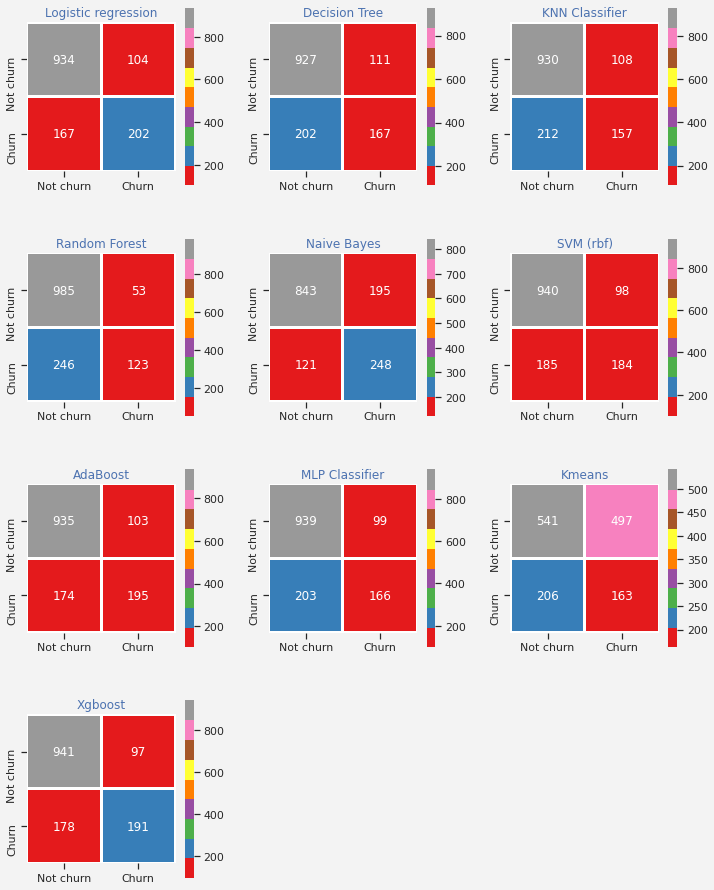

In [ ]:
confmatplot(models, X_train, X_test,y_train, y_test, 3)